In [11]:
import pandas as pd
import glob
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

Leggiamo i 4 files di dati sui rapporti di lavoro, aggiungendo una colonna che indichi la tipologia di contenuto del file (colonna TIPOLOGIA) estraendo dal nome del file la tipologia a cui fa riferimento il file
In questa fase leggiamo anche la data nel formato testo, successivamente aggiungiamo una colonna in formato data utilizzando l'opzione coerce che forza NaT, cioè il missing value per le date, in modo da poter lavorare solo con gli anni corretti.
Al termine concateniamo tutti i file in un solo dataframe

In [24]:
datafiles = glob.glob('Rapporti_di_lavoro_*.zip')
files = []
for file in datafiles:
    df_tmp = pd.read_csv(file, compression='zip')
    df_tmp['TIPOLOGIA'] = file[19:-4]
    df_tmp['DATA_EVENTO'] = pd.to_datetime(df_tmp['DATA'], format='%d/%m/%Y', errors='coerce')
    files.append(df_tmp)

frame = pd.concat(files, axis=0, ignore_index=True)

In [25]:
frame

,DATA,GENERE,ETA,SETTOREECONOMICODETTAGLIO,TITOLOSTUDIO,CONTRATTO,MODALITALAVORO,PROVINCIAIMPRESA,ITALIANO,TIPOLOGIA,DATA_EVENTO
0,02/04/2019,M,20,Lavori di meccanica generale,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,cessati,2019-04-02
1,08/06/2018,F,28,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,cessati,2018-06-08
2,02/02/2016,F,20,Fabbricazione di altre apparecchiature elettri...,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,APPRENDISTATO PROFESSIONALIZZANTE O CONTRATTO ...,TEMPO PIENO,BERGAMO,ITALIA,cessati,2016-02-02
3,12/01/2015,M,59,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,cessati,2015-01-12
4,09/08/2017,M,61,"Gestioni di funicolari, ski-lift e seggiovie s...",LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,BERGAMO,ITALIA,cessati,2017-08-09
...,...,...,...,...,...,...,...,...,...,...,...
18710142,09/08/2017,M,22,Commercio al dettaglio di carburante per autot...,NESSUN TITOLO DI STUDIO,LAVORO A TEMPO DETERMINATO,TEMPO PARZIALE ORIZZONTALE,BRESCIA,PAKISTAN,trasformati,2017-08-09
18710143,01/10/2019,F,42,Produzione di software non connesso all'edizione,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,TIROCINIO,TEMPO PIENO,MONZA E BRIANZA,ITALIA,trasformati,2019-10-01
18710144,02/06/2012,M,40,Lavori di meccanica generale,LICENZA MEDIA,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,ITALIA,trasformati,2012-06-02
18710145,02/05/2021,M,21,Fabbricazione di altre pompe e compressori,DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CH...,LAVORO A TEMPO DETERMINATO,TEMPO PIENO,MONZA E BRIANZA,PAKISTAN,trasformati,2021-05-02


Aggiungiamo due colonne, una per l'anno e una per il mese, per poter fare delle statistiche sugli anni e capire se ci sono anni inconsistenti.


In [26]:
frame['ANNO'] = pd.DatetimeIndex(frame['DATA_EVENTO']).year
frame['MESE'] = pd.DatetimeIndex(frame['DATA_EVENTO']).month

In [51]:
frame['ANNO'].describe().apply(lambda x: format(x, '.2f'))

count    18710146.00
mean         2015.48
std             3.53
min          1973.00
25%          2012.00
50%          2016.00
75%          2018.00
max          2201.00
Name: ANNO, dtype: object

Facciamo una prima frequenza ordinata per anno

In [42]:
frame.groupby(['ANNO'])['ANNO'].count()

ANNO
1973.0          1
1974.0          1
1976.0          1
1978.0          2
1979.0          1
1980.0          1
1981.0          1
1982.0          1
1988.0          3
1989.0          1
1990.0          1
1992.0          1
1994.0          1
1995.0          1
1996.0          2
1997.0          3
1998.0          5
1999.0          7
2000.0          5
2001.0       1540
2002.0          9
2003.0         41
2004.0         23
2005.0         32
2006.0        475
2007.0       1393
2008.0       4494
2009.0     667880
2010.0    1312340
2011.0    1419493
2012.0    1331612
2013.0    1298265
2014.0    1351324
2015.0    1537534
2016.0    1550861
2017.0    1760738
2018.0    1917336
2019.0    1778718
2020.0    1436826
2021.0    1339172
2201.0          1
Name: ANNO, dtype: int64

Dopo aver fatto una frequenza e visto le statistiche proviamo a fare un binning tagliando alcune classi

In [56]:
cut_labels_anno = ['Fino al 2010', '2011',
                   '2012', '2013', '2014', '2015', '2016', '2017', '2018',
                   '2019', '2020', '2021', 'Non validi']
cut_bins = [1970, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2300]
frame['CLASSE_ANNI'] = pd.cut(frame['ANNO'], bins=cut_bins, labels=cut_labels_anno)

In [57]:
frame.groupby(['CLASSE_ANNI'])['CLASSE_ANNI'].count()

CLASSE_ANNI
Fino al 2010    1988266
2011            1419493
2012            1331612
2013            1298265
2014            1351324
2015            1537534
2016            1550861
2017            1760738
2018            1917336
2019            1778718
2020            1436826
2021            1339172
Non validi            1
Name: CLASSE_ANNI, dtype: int64

In [63]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18710147 entries, 0 to 18710146
Data columns (total 14 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   DATA                       object        
 1   GENERE                     object        
 2   ETA                        int64         
 3   SETTOREECONOMICODETTAGLIO  object        
 4   TITOLOSTUDIO               object        
 5   CONTRATTO                  object        
 6   MODALITALAVORO             object        
 7   PROVINCIAIMPRESA           object        
 8   ITALIANO                   object        
 9   TIPOLOGIA                  object        
 10  DATA_EVENTO                datetime64[ns]
 11  ANNO                       float64       
 12  MESE                       float64       
 13  CLASSE_ANNI                category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.8+ GB


<AxesSubplot:xlabel='CLASSE_ANNI', ylabel='count'>

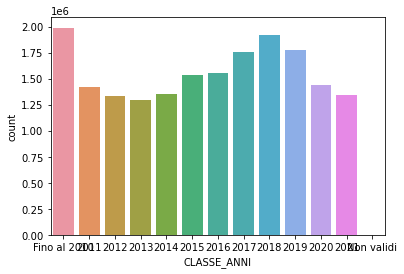

In [65]:
sns.countplot(data=frame, x="CLASSE_ANNI")

<AxesSubplot:xlabel='ANNO', ylabel='Density'>

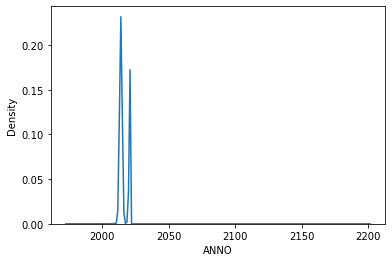

In [39]:
sns.kdeplot(data=frame, x="ANNO")

In [19]:
frame['DATA_EVENTO'].describe(datetime_is_numeric=True)

/var/folders/bq/lfznycxj76g51hkjtmdqtd5h0000gn/T/ipykernel_2181/922864191.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  frame['DATA_EVENTO'].describe()


count                18710146
unique                   2345
top       2018-01-10 00:00:00
freq                    36868
first     1973-01-02 00:00:00
last      2201-09-06 00:00:00
Name: DATA_EVENTO, dtype: object

In [17]:
frame.groupby(['MESE']).size()

MESE
1.0     1684408
2.0     1829988
3.0     1818345
4.0     1831601
5.0     1604039
6.0     1383646
7.0     1426596
8.0     1354519
9.0     1429647
10.0    1449210
11.0    1461665
12.0    1436482
dtype: int64

Considerata la distribuzione sugli anni prendiamo in considerazione solo gli anni dal 2012 al 2021

In [31]:
frame_clean_date = frame.query('ANNO >= 2012 & ANNO <= 2021')

Facciamo una frequenza sui settori e osserviamo che le diciture sono quelle utilizzate nella classificazione delle attività del codice ATECO

In [35]:
frame_clean_date.groupby(['SETTOREECONOMICODETTAGLIO']).size()

SETTOREECONOMICODETTAGLIO
Acquacoltura in acqua di mare, salmastra o lagunare e servizi connessi                                1574
Acquacoltura in acque dolci e servizi connessi                                                         711
Affari esteri                                                                                         1238
Affittacamere per brevi soggiorni, case ed appartamenti per vacanze, bed and breakfast, residence    12872
Affitto di aziende                                                                                     649
                                                                                                     ...  
Trattamento igienico del latte                                                                        1806
Trivellazioni e perforazioni                                                                          3476
Università popolare                                                                                     86
Utilizzo di

Carichiamo il codice ATECO e lo agganciamo al dataframe per poter fare delle statistiche sui 19 macro settori

In [36]:
ateco = pd.read_excel('CodiceAteco.xlsx')
ateco

,Lettera,Codice Ateco 2007,Descrizione
0,A,A,"AGRICOLTURA, SILVICOLTURA E PESCA"
1,A,01,COLTIVAZIONI AGRICOLE E PRODUZIONE DI PRODOTTI...
2,A,01.1,COLTIVAZIONE DI COLTURE AGRICOLE NON PERMANENTI
3,A,01.11,"Coltivazione di cereali (escluso il riso), leg..."
4,A,01.11.1,Coltivazione di cereali (escluso il riso)
...,...,...,...
1885,T,97.00.02,Attività di condomini
1886,T,98,PRODUZIONE DI BENI E SERVIZI INDIFFERENZIATI P...
1887,T,98.1,PRODUZIONE DI BENI INDIFFERENZIATI PER USO PRO...
1888,T,98.2,PRODUZIONE DI SERVIZI INDIFFERENZIATI PER USO ...


In [37]:
frame_ateco = frame_clean_date.merge(ateco, left_on='SETTOREECONOMICODETTAGLIO', right_on='Descrizione', how='left', indicator=True)

In [38]:
frame_ateco.groupby(['TIPOLOGIA']).size()

TIPOLOGIA
attivati       7528785
cessati        2905624
prorogati      3153126
trasformati    1714851
dtype: int64

In [39]:
pd.crosstab(frame_ateco.Lettera, frame_ateco.GENERE)

GENERE,F,M
Lettera,,
A,48020,160808
B,565,3792
C,849863,1902997
D,7140,11699
E,8347,49302
F,37650,520790
G,855166,685554
H,231613,778538
I,717758,865158


In [40]:
frame_ateco.DATA.max()

'12/12/2020'

In [41]:
frame_ateco.DATA.min()

'01/01/2012'

In [42]:
pd.crosstab(frame_ateco.TITOLOSTUDIO, frame_ateco.GENERE, margins=True)

GENERE,F,M,All
TITOLOSTUDIO,,,
DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE CHE PERMETTE L'ACCESSO ALL'UNIVERSITA,1991599,1823973,3815572
DIPLOMA DI SPECIALIZZAZIONE,43511,34592,78103
DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO,8133,9030,17163
DIPLOMA UNIVERSITARIO,68407,44859,113266
LAUREA - Vecchio o nuovo ordinamento,934921,569232,1504153
LICENZA ELEMENTARE,33902,107629,141531
LICENZA MEDIA,1640649,2749542,4390191
MASTER UNIVERSITARIO DI PRIMO LIVELLO,10397,6962,17359
NESSUN TITOLO DI STUDIO,1658697,2493637,4152334
